# **Loading the Libraries and Data**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings


#**Global Functions and Values**

In [ ]:
# Function to return metrics
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef

def get_model_metrics(model_name, y_true, y_pred):
    metrics = {}
    metrics['Model'] = model_name
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['ROC-AUC Score'] = roc_auc_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred)
    metrics['Recall'] = recall_score(y_true, y_pred)
    metrics['F1-Score'] = f1_score(y_true, y_pred)
    metrics['Kappa'] = cohen_kappa_score(y_true, y_pred)
    metrics['MCC'] = matthews_corrcoef(y_true, y_pred)
    
    return metrics


In [ ]:
#list to metrics of all tables
metrics_table = list()

# **Load Dataset**

## Load dataset from Github Repository

In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/ARP_MitM_sampled.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/Active_Wiretap_sampled.csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/Fuzzing_sampled.csv')
df4 = pd.read_csv("https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/Mirai_sampled.csv")
df5 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/OS_Scan_sampled.csv')
df6 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/SSDP_Flood_sampled.csv')
df7 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/SSL_Renegotiation_sampled.csv')
df8 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/SYN_DoS_sampled.csv')
df9 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/Video_Injection_sampled.csv')

## Displaying the contents of the file


**Primary object types:**
- **DataFrame:** rows and columns (like a spreadsheet)
- **Series:** a single column


**Get dataframe**: 
Read CSV file from the 'data' subdirectory using a relative path.
*  `head() `will print the first 5 rows of the dataframe
*  `tail()` will print the last 5 rows) of the dataframe




In [ ]:
# displaying the contents of the XLSX file
df1 = df1.drop(['Unnamed: 0',	'index'], axis=1)
df1.head(2)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,1,162.251328,1287.930495,137946.585241,277.376266,1290.621872,139699.421710,862.105671,1294.355651,140928.760080,...,179786.099514,0.0,0.0,28128.538982,1335.626000,425.845352,1335.626000,181344.263583,0.0,0.0
1,1,387.752010,1306.058869,220121.097478,637.303410,1316.728781,207438.876258,1924.246172,1331.715608,189917.368904,...,181996.614142,0.0,0.0,28051.498932,1340.999983,425.651549,1340.999983,181179.241248,0.0,0.0


In [ ]:
df2 = df2.drop(['Unnamed: 0',	'index'], axis=1)
df2.head(2)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,1,163.049513,1306.129759,133895.850037,283.632401,1305.573004,133300.917659,871.595910,1300.438768,137735.237195,...,57217.762833,1.914975e-09,1.143837e-07,27911.418879,1227.676709,237.573391,1229.142248,56441.116252,0.221214,0.001032
1,1,174.527618,1295.076626,145592.073006,295.358524,1297.920763,141931.132312,883.612806,1297.616196,140815.653256,...,183926.684931,0.000000e+00,0.000000e+00,26755.578455,1334.536548,427.019985,1335.884650,182346.067560,0.000000,0.000000


In [ ]:
df3 = df3.drop(['Unnamed: 0',	'index'], axis=1)
df3.head(2)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,1,183.422791,1336.527256,190462.742960,291.849930,1336.289854,189878.320827,850.126451,1336.942110,187900.563560,...,179608.126627,0.0,0.0,28076.951594,1340.929813,425.522919,1340.929813,181069.754307,0.0,0.0
1,1,237.879413,1356.333015,175809.072163,346.842926,1347.008011,183339.520567,903.558706,1340.022021,187013.751527,...,183211.967235,0.0,0.0,28082.917849,1340.514610,426.459844,1340.514610,181867.998735,0.0,0.0


In [ ]:
df4 = df4.drop(['0'], axis=1)
df4 = df4.drop(['Unnamed: 0',	'index'], axis=1)
df4.head(2)
# list(df4)


,x,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,1,112.097168,60.035565,0.739410,153.541719,60.066094,1.315846,361.114006,60.101399,1.764327,...,5.002221e-12,0.0,0.0,20727.018620,60.0,0.000010,60.0,9.276846e-11,0.0,0.0
1,1,117.742473,60.138909,1.829893,162.204865,60.210187,2.786475,376.574119,60.236818,3.256390,...,4.092726e-12,0.0,0.0,22446.495481,60.0,0.000006,60.0,4.001777e-11,0.0,0.0


In [ ]:
df5 = df5.drop(['Unnamed: 0',	'index'], axis=1)
df5.head(2)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,1,774.199578,60.0,5.002221e-12,1172.275787,60.0,8.640200e-12,3044.228765,60.0,2.273737e-12,...,0.0,0.0,0.0,1.0,60.0,0.0,60.000000,0.0,0.0,0.0
1,1,732.896796,60.0,8.185452e-12,1160.217723,60.0,1.364242e-12,3296.988952,60.0,3.592504e-11,...,0.0,0.0,0.0,1.0,60.0,0.0,84.852814,0.0,0.0,0.0


In [ ]:
df6 = df6.drop(['Unnamed: 0',	'index'], axis=1)
df6.head(2)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,0,1.997162,830.381872,385019.472302,1.998296,830.029123,385019.970028,1.999432,829.676374,385020.218892,...,0.000000,0.0,0.0,1.000000,1450.000000,0.0,1450.000000,0.00,0.0,0.0
1,0,2.996940,586.005354,375805.676539,2.998163,585.869927,375719.284013,2.999387,585.734436,375632.816999,...,3080.249997,0.0,0.0,1.999994,153.499836,55.5,153.499836,3080.25,0.0,0.0


In [ ]:
df7 = df7.drop(['Unnamed: 0',	'index'], axis=1)
df7.head(3)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,0,201.933924,751.076479,448315.216282,267.334718,749.056876,445832.685644,603.764783,745.692054,441529.126214,...,33157.526501,0.000000e+00,0.000000e+00,5889.520552,147.270744,179.537822,147.270744,32233.829699,0.000000e+00,0.000000e+00
1,0,275.855663,745.492465,441894.936067,408.565730,744.033612,439475.223524,1090.770627,742.309873,436848.814508,...,30043.252662,0.000000e+00,0.000000e+00,17746.423096,150.873977,179.105631,150.873977,32078.826919,0.000000e+00,0.000000e+00
2,0,45.069225,1416.091201,31374.311828,78.276855,1416.709773,30919.455107,253.852811,1412.537252,34984.757411,...,35626.304470,5.470622e-12,1.109738e-08,16501.769970,1411.756991,184.838747,1413.031423,34165.362231,1.418180e-11,1.060973e-08


In [ ]:
# displaying the contents of the XLSX file
df8 = df8.drop(['Unnamed: 0',	'index'], axis=1)
df8.head(2)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,0,1.999868,773.955314,456975.998003,1.999921,773.973188,456975.999281,1.999974,773.991063,456975.999920,...,0.000000e+00,0.0,0.0,1.000000,98.0,0.000000,98.0,0.000000e+00,0.0,0.0
1,0,2.998371,999.425957,406159.137822,2.999023,999.388902,406175.842945,2.999674,999.351854,406192.541806,...,9.313226e-10,0.0,0.0,1.999998,1450.0,0.000022,1450.0,4.656613e-10,0.0,0.0


In [ ]:
df9 = df9.drop(['Unnamed: 0',	'index'], axis=1)
df9.head(2)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,0,1.995812,862.869190,425754.375319,1.997485,862.321515,425755.575114,1.999161,861.773838,425756.175013,...,425756.249250,0.0,0.0,1.999992,861.502738,652.500000,861.502738,425756.249993,0.0,0.0
1,0,2.995771,1080.219198,377918.162404,2.997460,1079.731725,378131.164377,2.999153,1079.243977,378343.810605,...,378439.385077,0.0,0.0,2.999992,1079.002440,615.182037,1079.002440,378448.938548,0.0,0.0


**Observation:**
* We have 9 datasets with 116 columns each, out of which columns each.

## Merge the datsets

In [ ]:
df1.columns = ['feature_'+str(i) for i in range(0,116)]
df2.columns = ['feature_'+str(i) for i in range(0,116)]
df3.columns = ['feature_'+str(i) for i in range(0,116)]
df4.columns = ['feature_'+str(i) for i in range(0,116)]
df5.columns = ['feature_'+str(i) for i in range(0,116)]
df6.columns = ['feature_'+str(i) for i in range(0,116)]
df7.columns = ['feature_'+str(i) for i in range(0,116)]
df8.columns = ['feature_'+str(i) for i in range(0,116)]
df9.columns = ['feature_'+str(i) for i in range(0,116)]

In [ ]:
df1['attack']=1
df2['attack']=2
df3['attack']=3
df4['attack']=4
df5['attack']=5
df6['attack']=6
df7['attack']=7
df8['attack']=8
df9['attack']=9

In [ ]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9])

In [ ]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack
0,1,162.251328,1287.930495,137946.585241,277.376266,1290.621872,139699.421710,862.105671,1294.355651,140928.760080,...,0.0,0.0,28128.538982,1335.626000,425.845352,1335.626000,181344.263583,0.0,0.0,1
1,1,387.752010,1306.058869,220121.097478,637.303410,1316.728781,207438.876258,1924.246172,1331.715608,189917.368904,...,0.0,0.0,28051.498932,1340.999983,425.651549,1340.999983,181179.241248,0.0,0.0,1
2,1,379.466053,1347.077216,172679.023477,633.858286,1345.691594,175484.443945,1942.359870,1342.632301,179854.874354,...,0.0,0.0,27751.882884,1341.513646,424.904429,1341.513646,180543.774059,0.0,0.0,1
3,1,428.413637,1335.090314,193351.408058,681.055680,1333.676220,190797.906136,1971.296012,1337.078715,183403.845860,...,0.0,0.0,27948.812569,1341.115622,425.224505,1341.115622,180815.879583,0.0,0.0,1
4,1,151.173948,1279.523342,157603.223345,269.501602,1286.223631,151292.562593,855.352870,1290.355020,147041.015366,...,0.0,0.0,28174.860496,1334.685469,426.811681,1334.685469,182168.211433,0.0,0.0,1


# **Data Preprocessing**


**Importance of Data Preprocessing stage**
1. Different ML models have different required input data (numerical data, images in specific format, etc). Without the right data, nothing will work.
2. Because of “bad” data, ML models will not give any useful results, or even may give wrong answers, that may lead to wrong decisions (GIGO principle).
3. The higher the quality of the data, the less data is needed.

## Reset Column Names

In [ ]:
df.columns = ['feature_'+str(i) for i in range(len(df.columns))]

In [ ]:
df.columns.values[0]='label'
df.columns.values[-1]='attack'

In [ ]:
cols = list(df)[1:]
cols.append('label')
# Reorder the columns
df = df[cols]

In [ ]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack,label
0,162.251328,1287.930495,137946.585241,277.376266,1290.621872,139699.421710,862.105671,1294.355651,140928.760080,8708.282524,...,0.0,28128.538982,1335.626000,425.845352,1335.626000,181344.263583,0.0,0.0,1,1
1,387.752010,1306.058869,220121.097478,637.303410,1316.728781,207438.876258,1924.246172,1331.715608,189917.368904,19614.490170,...,0.0,28051.498932,1340.999983,425.651549,1340.999983,181179.241248,0.0,0.0,1,1
2,379.466053,1347.077216,172679.023477,633.858286,1345.691594,175484.443945,1942.359870,1342.632301,179854.874354,19641.527990,...,0.0,27751.882884,1341.513646,424.904429,1341.513646,180543.774059,0.0,0.0,1,1
3,428.413637,1335.090314,193351.408058,681.055680,1333.676220,190797.906136,1971.296012,1337.078715,183403.845860,18836.905420,...,0.0,27948.812569,1341.115622,425.224505,1341.115622,180815.879583,0.0,0.0,1,1
4,151.173948,1279.523342,157603.223345,269.501602,1286.223631,151292.562593,855.352870,1290.355020,147041.015366,8714.034018,...,0.0,28174.860496,1334.685469,426.811681,1334.685469,182168.211433,0.0,0.0,1,1


In [ ]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack,label
count,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,...,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,1.799400e+04,17994.000000,17994.000000,17998.000000,17998.000000
mean,590.001582,857.763041,179333.709871,971.216290,858.429179,178754.480328,2849.822370,859.490195,177962.861751,26083.685756,...,-0.000052,15135.163135,860.338704,220.391662,911.752972,8.622016e+04,-0.642570,-0.000201,4.999889,0.350317
std,1672.259132,525.861139,157456.903472,2786.477502,526.194303,157135.199378,8352.314584,526.723421,156845.310038,79552.427675,...,0.004580,12685.595423,608.959023,189.612557,590.260119,8.274561e+04,24.555470,0.006196,2.582183,0.477082
min,1.000000,52.000000,0.000000,1.000000,52.000000,0.000000,1.000000,52.000000,0.000000,1.000000,...,-0.276309,1.000000,52.000000,0.000000,52.000000,0.000000e+00,-2011.316691,-0.314397,1.000000,0.000000
25%,56.061229,136.000000,225.624024,86.288658,136.000000,304.027158,200.777767,136.000000,415.872886,1356.221785,...,0.000000,72.628172,136.000000,0.000007,150.507101,9.313226e-10,0.000000,0.000000,3.000000,0.000000
50%,139.743726,1231.631585,170520.674718,216.059493,1234.975971,173093.596850,574.416212,1236.700796,177195.319543,5216.721656,...,0.000000,17303.812382,1334.520728,221.765288,1335.198361,5.275406e+04,0.000000,0.000000,5.000000,0.000000
75%,243.685256,1328.156284,222725.513399,381.475034,1331.337628,213747.656584,1089.506496,1335.374246,204456.933708,10379.729109,...,0.000000,27960.225050,1341.307654,425.192396,1341.489508,1.807886e+05,0.000000,0.000000,7.000000,1.000000
max,7436.865335,1452.000000,488785.862233,12392.617904,1452.000000,488812.666765,37163.978483,1452.000000,488832.368521,354099.847565,...,0.347487,41243.896714,1452.000000,699.170575,1452.000000,4.888395e+05,3.472361,0.405684,9.000000,1.000000


## **Handling missing data**

Using `isna().sum()` function gives the sum of the null values preset in the dataset column-wise.

`fillna()` function will fill NA/NaN or 0 values in place of null spaces.
> `df["colName"].fillna("replacingValue", inplace = True)`

In [ ]:
#check null values
df_null = df[df.isna().any(axis=1)]
df_null

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack,label
999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,0
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1
999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,1


**Observation** : remove these 4 rows with null Values Found

In [ ]:
df = df.dropna()
df_null = df[df.isna().any(axis=1)]
df_null

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack,label


In [ ]:
df.shape

(17994, 117)

**Observation**: We are left with 17994 rows × 117 columns of data

In [ ]:
from google.colab import files
# Save the DataFrame to an Excel file
df.to_excel('output.xlsx', index=False)
# Download the Excel file to our local system
files.download('output.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Data Transformation**

### **Standardization**

**min_max scaler** is a way to get data in the range 0 to 1

**StandardScaler** if we need -1 to 1 range. Scale each variable to have a mean of 0 and a standard deviation of 1

We use scaling so that each variable has equal importance when fitting the k-means algorithm. Otherwise, the variables with the widest ranges would have too much influence.

In [ ]:
#Importing required modules
from sklearn.preprocessing import MinMaxScaler

#create scaled DataFrame where each variable has mean of 0 and standard dev of 1
df_scaled = MinMaxScaler().fit_transform(df)

#view first five rows of scaled DataFrame
df_scaled = pd.DataFrame(df_scaled, columns = list(df))
df_scaled.head()


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack,label
0,0.021686,0.882807,0.282223,0.022303,0.884730,0.285793,0.023171,0.887397,0.288297,0.024590,...,0.442948,0.681997,0.916876,0.609072,0.916876,0.370969,0.998277,0.436614,0.0,1.0
1,0.052012,0.895756,0.450343,0.051350,0.903378,0.424373,0.051752,0.914083,0.388512,0.055390,...,0.442948,0.680129,0.920714,0.608795,0.920714,0.370631,0.998277,0.436614,0.0,1.0
2,0.050897,0.925055,0.353282,0.051071,0.924065,0.359001,0.052239,0.921880,0.367928,0.055466,...,0.442948,0.672865,0.921081,0.607726,0.921081,0.369331,0.998277,0.436614,0.0,1.0
3,0.057480,0.916493,0.395575,0.054880,0.915483,0.390329,0.053018,0.917913,0.375188,0.053194,...,0.442948,0.677639,0.920797,0.608184,0.920797,0.369888,0.998277,0.436614,0.0,1.0
4,0.020196,0.876802,0.322438,0.021668,0.881588,0.309510,0.022989,0.884539,0.300800,0.024606,...,0.442948,0.683120,0.916204,0.610454,0.916204,0.372654,0.998277,0.436614,0.0,1.0


## **Handling (drop) outliers**
    # Note: dropping is only one of techniques to handle with outliers


### Z-Score
* A **z-score** measures how many standard deviations a data point is from the mean in a distribution.
* A normal distribution is shown below and it is estimated that
>* outliers_threshold = 1: 68% of the data points lie between +/- 1 standard deviation.
>* outliers_threshold = 2: 95% of the data points lie between +/- 2 standard deviation
>* outliers_threshold = 3: 99.7% of the data points lie between +/- 3 standard deviation
>* outliers_threshold = 4: 99.9% of the data points lie between +/- 4 standard deviation
* We are removing all the rows above this outlier threshold

In [ ]:
from scipy import stats
import numpy as np
z_scores = np.abs(stats.zscore(df_scaled, nan_policy='omit'))
z_scores.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack,label
0,0.255799,0.818048,0.262855,0.249009,0.821379,0.248551,0.237991,0.825628,0.236125,0.218421,...,0.011281,1.024291,0.780513,1.083575,0.718132,1.149629,0.026169,0.032363,1.548927,1.361922
1,0.120947,0.852522,0.259046,0.119837,0.870994,0.182551,0.110820,0.896559,0.076221,0.081322,...,0.011281,1.018217,0.789338,1.082553,0.727237,1.147635,0.026169,0.032363,1.548927,1.361922
2,0.125902,0.930527,0.042265,0.121073,0.926038,0.020811,0.108651,0.917285,0.012063,0.080982,...,0.011281,0.994598,0.790182,1.078612,0.728107,1.139955,0.026169,0.032363,1.548927,1.361922
3,0.096631,0.907731,0.089028,0.104135,0.903203,0.076646,0.105187,0.906741,0.034691,0.091097,...,0.011281,1.010123,0.789528,1.080300,0.727433,1.143243,0.026169,0.032363,1.548927,1.361922
4,0.262423,0.802060,0.138013,0.251836,0.813020,0.174771,0.238799,0.818032,0.197154,0.218348,...,0.011281,1.027942,0.778969,1.088671,0.716539,1.159587,0.026169,0.032363,1.548927,1.361922


In [ ]:
outliers_threshold = 3
mask = (z_scores <= outliers_threshold).all(axis=1)
print(f" No. of outlier rows = {len(mask[mask == False])} from total {df_scaled.shape[0]} rows")

 No. of outlier rows = 2506 from total 17994 rows


**Observation:** :  No. of outlier rows = 2506 from total 17994 rows

Let us remove these outliers.

In [ ]:
df_zscored = df_scaled[mask]
df_zscored.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack,label
0,0.021686,0.882807,0.282223,0.022303,0.884730,0.285793,0.023171,0.887397,0.288297,0.024590,...,0.442948,0.681997,0.916876,0.609072,0.916876,0.370969,0.998277,0.436614,0.0,1.0
1,0.052012,0.895756,0.450343,0.051350,0.903378,0.424373,0.051752,0.914083,0.388512,0.055390,...,0.442948,0.680129,0.920714,0.608795,0.920714,0.370631,0.998277,0.436614,0.0,1.0
3,0.057480,0.916493,0.395575,0.054880,0.915483,0.390329,0.053018,0.917913,0.375188,0.053194,...,0.442948,0.677639,0.920797,0.608184,0.920797,0.369888,0.998277,0.436614,0.0,1.0
4,0.020196,0.876802,0.322438,0.021668,0.881588,0.309510,0.022989,0.884539,0.300800,0.024606,...,0.442948,0.683120,0.916204,0.610454,0.916204,0.372654,0.998277,0.436614,0.0,1.0
5,0.049525,0.927026,0.348894,0.050394,0.927694,0.346782,0.051844,0.926265,0.352461,0.055374,...,0.442948,0.679610,0.920827,0.608554,0.920827,0.370338,0.998277,0.436614,0.0,1.0


In [ ]:
df_zscored.shape

(15488, 117)

We now have 15488 rows of clean data


# **Model Building**

In [ ]:

# Split the dataset into training and testing sets
X = df_scaled.drop(['attack', 'label'], axis=1) # features
y = df_scaled['label'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Feature Selection**

With 115 feature columns, we mustreduce the number of features to improve the model's performance and reduce overfitting. Feature selection techniques such as correlation analysis, mutual information, or feature importance metrics from a tree-based model can help identify the most important features for prediction.

###Correltion Analysis

The Result of the corr() method is a table with a lot of numbers that represents how well the relationship is between two columns.

The number varies from -1 to 1.

* 1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.

* 0.9 is also a good relationship, and if we increase one value, the other will probably increase as well.

* -0.9 would be just as good relationship as 0.9, but if we increase one value, the other will probably go down.

* 0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will.

In [ ]:
len(list(df_scaled))

117

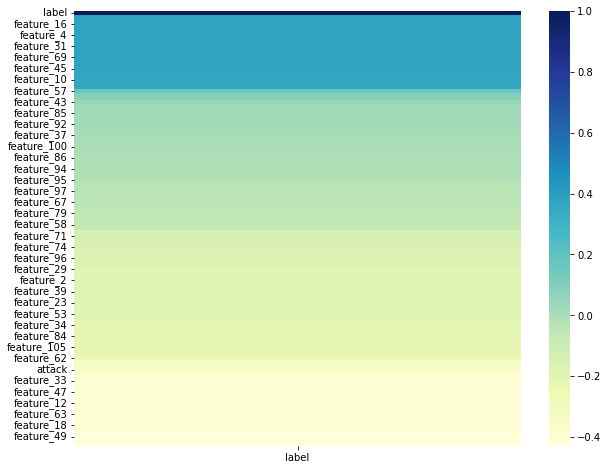

In [ ]:
# correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
corr = ((df_scaled.corr().iloc[:,-1]).sort_values(ascending=False)).to_frame()
sns.heatmap(corr, cmap="YlGnBu")
plt.show()
# sns.heatmap(corr, annot=True)

**Observation**
Below is the list of columns with **low** correlation with the label. ie. (-0.3 < corr < 0.3) . These are not good candidates for predictions

In [ ]:
corr[(corr["label"] > -0.3) & (corr["label"] < 0.3)]


,label
feature_57,0.159539
feature_109,0.103435
feature_50,0.085780
feature_43,0.046523
feature_102,0.032101
...,...
feature_98,-0.214617
feature_105,-0.215071
feature_112,-0.215395
feature_55,-0.228069


**Observation**
Below is the list of columns with **high** correlation with the label. ie. (corr <= -0.3) or (corr >= 0.3) . These are good Candidates for predictions

In [ ]:
corr[(corr["label"] <= -0.3) | (corr["label"] >= 0.3)]

,label
label,1.000000
feature_28,0.381291
feature_13,0.377549
feature_16,0.376207
feature_1,0.376136
feature_19,0.374953
feature_4,0.374840
feature_78,0.373190
feature_59,0.373190
feature_31,0.372689


**Observation** : This can be useful when we have prior knowledge that certain features are likely to be important for the target variable, which we do not know in our dataset.
However, it is important to note that correlation does not necessarily imply causation, and the selected features may not necessarily be the most predictive ones.

### SelectKBest

It's better to call SelectKBest() after splitting the data into training and testing sets. This is because feature selection should be based only on the training set and then applied to both the training and testing sets. If we apply feature selection on the entire dataset before splitting, we risk introducing bias into our model evaluation, as the testing set would have "seen" some of the selected features during the training process.

In addition, by selecting features based only on the training set, we ensure that our model is generalizable to new, unseen data.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Feature selection and engineering
selector = SelectKBest(f_classif, k=50)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

**Observation**: This method is more objective and can potentially identify more relevant features than using correlation. However, it is important to choose the right value of k (number of features to select) and also to consider the possibility of overfitting.

Since in our correlation Analysis we were getting about 44 columns which were closely correlated to the label, we decided to choose a closer number, 50, as the value of k in select K best

## GridSearchCV

GridSearchCV trains and evaluates the model with all possible combinations of hyperparameters from the param_grid dictionary using cross-validation (cv=5), and returns the best set of hyperparameters that result in the highest score on the training data.

Using the best set of hyperparameters returned by GridSearchCV can potentially improve the performance of the model on unseen data. It helps to tune the model and prevent overfitting.
* `grid_search.best_score_` returns the mean cross-validated score achieved by the best estimator found by GridSearchCV during the parameter tuning process.
This means that it returns the average performance of the model over all cross-validation folds when trained with the best hyperparameters found by the grid search. It is a useful metric to compare different models and hyperparameter settings to see which ones perform better
* `grid_search.best_params_` returns a dictionary of the best combination of hyperparameters found by the GridSearchCV object during cross-validation. This dictionary contains the values of hyperparameters that achieved the best mean cross-validated score on the training set. These hyperparameters can then be used to instantiate and train a new model on the entire training set.






## **Logistic Regression**



 This is a common classification algorithm used for binary classification problems. It is a linear model that predicts the probability of an instance belonging to the positive class. Logistic regression works well when there are no complex interactions between features.

In [ ]:
# Train and evaluate logistic regression
metrics_table = list()
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')

# Define the parameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1.0],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500],  
}


# Create an instance of the model
logreg = LogisticRegression()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, verbose=1  )

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_logreg =LogisticRegression(**grid_search.best_params_)

#Train the model on the training data
best_logreg.fit(X_train, y_train)

#Calculate predictions on Model
y_pred_logreg = best_logreg.predict(X_test)

#get the Performance metrics by method created above
metric_logreg = get_model_metrics(model_name="LogisticRegression", y_true=y_test, y_pred = y_pred_logreg)

#add metric to global list for conclusive evaluation
metrics_table.append(metric_logreg)

#display metric dictionary in df
pd.DataFrame.from_dict(metric_logreg, orient='index', columns=['Value'])


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters: {'C': 0.1, 'max_iter': 500, 'penalty': 'none', 'solver': 'newton-cg'}
Best score: 0.862104897533866


,Value
Model,LogisticRegression
Accuracy,0.859128
ROC-AUC Score,0.819545
Precision,0.874873
Recall,0.691318
F1-Score,0.772339
Kappa,0.672364
MCC,0.682137


##Decision Tree Classifier

Decision trees are a non-parametric model that can handle both continuous and categorical data. They are easy to interpret and visualize, which makes them useful for understanding how the model makes decisions.



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Create an instance of the model
dt = DecisionTreeClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Create an instance of the model with the best parameters
best_dt = DecisionTreeClassifier(**grid_search.best_params_)

# Train the model on the training data
best_dt.fit(X_train, y_train)

# Calculate predictions on Model
y_pred_dt = best_dt.predict(X_test)

# Get the Performance metrics by method created above
metric_dt = get_model_metrics(model_name="DecisionTreeClassifier", y_true=y_test, y_pred = y_pred_dt)

# Add metric to global list for conclusive evaluation
metrics_table.append(metric_dt)

# Display metric dictionary in df
pd.DataFrame.from_dict(metric_dt, orient='index', columns=['Value'])


Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.9647099687391455


,Value
Model,DecisionTreeClassifier
Accuracy,0.964435
ROC-AUC Score,0.962774
Precision,0.940758
Recall,0.957395
F1-Score,0.949004
Kappa,0.921703
MCC,0.921787


##Random Forest Classifier

Random Forest is an ensemble model that uses multiple decision trees to make predictions. It is a robust and flexible algorithm that works well with high-dimensional datasets.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
# Create an instance of the model
rf = RandomForestClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# #Train the model on the training data
# rf.fit(X_train, y_train)

# #Calculate predictions on Model
# y_pred_rf = rf.predict(X_test)

# Train and evaluate the model with the best hyperparameters
best_rf = RandomForestClassifier(**grid_search.best_params_)
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)

#get the Performance metrics by method created above
metric_rf = get_model_metrics(model_name="RandomForestClassifier", y_true=y_test, y_pred = y_pred_rf)

#add metric to global list for conclusive evaluation
metrics_table.append(metric_rf)

#display metric dictionary in df
pd.DataFrame.from_dict(metric_rf, orient='index', columns=['Value'])



Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 0.969989579715179


,Value
Model,RandomForestClassifier
Accuracy,0.971659
ROC-AUC Score,0.969622
Precision,0.955343
Recall,0.963023
F1-Score,0.959167
Kappa,0.937466
MCC,0.937483


##Gradient Boosting Classifier

Gradient Boosting is also an ensemble model that combines multiple weak models to make a strong prediction. It is a powerful algorithm that works well with large datasets and provides high accuracy.

In [ ]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50],
    'learning_rate': [0.1],
    'max_depth': [5],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Create an instance of the model
gb = GradientBoostingClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_gb = GradientBoostingClassifier(**grid_search.best_params_)

# Train the model on the training data
best_gb.fit(X_train, y_train)

# Calculate predictions on Model
y_pred_gb = best_gb.predict(X_test)

# Get the Performance metrics by method created above
metric_gb = get_model_metrics(model_name="GradientBoostingClassifier", y_true=y_test, y_pred=y_pred_gb)

# Add metric to global list for conclusive evaluation
metrics_table.append(metric_gb)

# Display metric dictionary in df
pd.DataFrame.from_dict(metric_gb, orient='index', columns=['Value'])


Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 0.9679749913164294


,Value
Model,GradientBoostingClassifier
Accuracy,0.968047
ROC-AUC Score,0.963828
Precision,0.957085
Recall,0.950161
F1-Score,0.95361
Kappa,0.929241
MCC,0.929255


##Support Vector Machine Classifier

SVM is a powerful algorithm that works well for high-dimensional datasets. It maps the data to a higher-dimensional space and tries to find a hyperplane that maximizes the margin between the two classes.

In [ ]:
from sklearn.svm import SVC

# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1.0],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create an instance of the model
svm = SVC()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Train the model on the training data with the best hyperparameters
best_svm = SVC(**grid_search.best_params_)
best_svm.fit(X_train, y_train)

#Calculate predictions on Model
y_pred_svm = best_svm.predict(X_test)

#get the Performance metrics by method created above
metric_svm = get_model_metrics(model_name="SupportVectorMachine", y_true=y_test, y_pred = y_pred_svm)

#add metric to global list for conclusive evaluation
metrics_table.append(metric_svm)

#display metric dictionary in df
pd.DataFrame.from_dict(metric_svm, orient='index', columns=['Value'])



,Value
Model,SupportVectorMachine
Accuracy,0.791609
ROC-AUC Score,0.759609
Precision,0.717047
Recall,0.655949
F1-Score,0.685139
Kappa,0.529868
MCC,0.531042


#**Model Evaluation**

When selecting a model, it is essential to consider the trade-off between model complexity and interpretability, performance, and computational resources. we can try out these models and compare their performance on a validation set using appropriate evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC curve. Based on the evaluation results, we can choose the best model that fits our requirements.

## Evaluation Metrics

In [ ]:
#To choose the best model let us display our conclusive metric
# highlight maximum value of each column
metric_df = pd.DataFrame(metrics_table)
metric_df.style.highlight_max(axis=0, subset=metric_df.columns[1:])

,Model,Accuracy,ROC-AUC Score,Precision,Recall,F1-Score,Kappa,MCC
0,LogisticRegression,0.859128,0.819545,0.874873,0.691318,0.772339,0.672364,0.682137
1,DecisionTreeClassifier,0.964435,0.962774,0.940758,0.957395,0.949004,0.921703,0.921787
2,RandomForestClassifier,0.971659,0.969622,0.955343,0.963023,0.959167,0.937466,0.937483
3,GradientBoostingClassifier,0.968047,0.963828,0.957085,0.950161,0.953610,0.929241,0.929255
4,SupportVectorMachine,0.791609,0.759609,0.717047,0.655949,0.685139,0.529868,0.531042


**Observation:** RandomForestClassifier	 performs as the best model for predicting the above data

**Reason:**
1. **Highest F1:** A high F1 score indicates that the model has both good precision and good recall, meaning that it is accurately identifying positive instances while minimizing false positives and false negatives. In other words, a high F1 score indicates that a model is effective at correctly identifying instances of a particular class.

2. **Highest AUC**: The higher the AUC score, the better the model's ability to correctly classify the positive and negative samples. 
It calibrates the trade-off between sensitivity and specificity at the best-chosen threshold. 
    Since, we care about true negatives as much as we care about true positives, it totally makes sense to choose high AUC.
3. **Highest MCC**: Since F1-score is asymmetric by not using True negatives at all, we use MCC. 
    A high MCC score indicates that the model has a strong overall performance,It means that the model is able to predict a high percentage of true positives and a high percentage of true negatives,on any balanced or imbalanced dataset. 
4. **Highest Accuracy**: (This is a win-win with other factors)
    With high accuracy, there is a high proportion of samples that are correctly classified.

##Visualize the best Model RandomForestClassifier's predictions

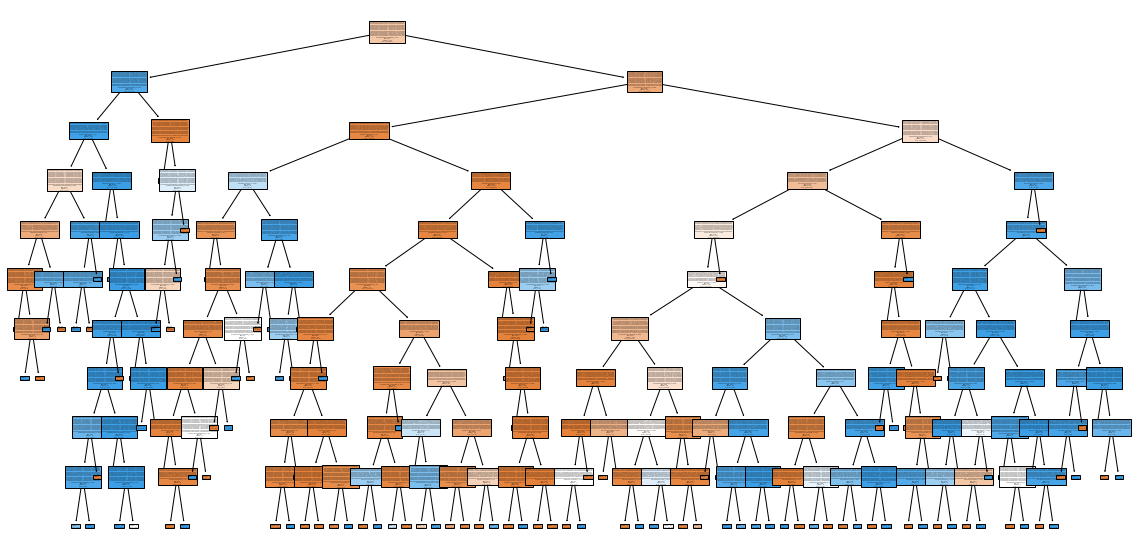

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# visualize the first decision tree in the random forest
plt.figure(figsize=(20,10))
plot_tree(best_rf.estimators_[0], feature_names=list(X_train), filled=True)
plt.show()


# Reflections

* **Model Selection:**
Several aspects, including the Kitsune model's precision, speed, and suitability for real-time monitoring, played a role in the decision to use it for network intrusion detection. A deep neural network-based model called Kitsune is capable of highly accurate real-time detection of anomalies in network traffic. The selection of Kitsune for intrusion detection was also influenced by its capacity to recognize novel and unidentified attacks. While comparing models, Kitsune's distinct capacity to recognize both known and unidentified network threats made it stand out.

* **Data Preprocessing**: Several preprocessing operations were carried out prior to feeding the data into the Kitsune model. To make sure that the data was in a format that the model could understand, these steps included feature scaling. The data points were removed in order to handle missing and corrupted data.


* **Exploratory data analysis (EDA)**: EDA conducted by visualizing and analyzing the correlation between different features using correlation matrices to gain insights into the dataset and understand the characteristics of the network traffic with respect to the data to be malicious or benign.

* **Model Training:**
The Kitsune model was trained on preprocessed data using specific hyperparameters and regularization techniques. The data was split into training and validation sets, and various metrics were used to evaluate the model's performance. During the training process, we encountered several challenges such as overfitting and convergence issues, which were addressed by adjusting the hyperparameters and regularization techniques.
Multiple models like Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Gradient Boosting Classifier, Support Vector Machine Classifier were traained to find the best model for our dataset


* **Model Evaluation:**
The test set was used to evaluate the performance of the Kitsune model, and it was found that the Random Forest Classifier model performed best with regards to unseen data. The model's high accuracy, capacity for spotting new threats, and capability for real-time monitoring were among its advantages. Large amounts of labeled data requirement and sensitivity to hyperparameter tuning were drawbacks.

* **Model Deployment:**
Deploying the Kitsune model in a real-world network environment requires careful consideration of various factors such as network topology, traffic volume, and security requirements. Integration into an existing intrusion detection system can be beneficial in detecting threats that may have been missed by traditional methods. However, limitations such as the need for high computing power and technical expertise must also be considered.

* **Future Work**:
Future studies can concentrate on addressing open problems and knowledge gaps, such as lowering the requirement for a lot of labeled data and enhancing the model's resistance to hyperparameter tuning. To better meet particular needs and address new threats, the Kitsune model can also be modified and extended. It might also be advantageous to investigate the possibility of combining Kitsune with other intrusion detection systems.


